# For Task 2.2 Only

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

In [2]:
def calculateMetrics(y_pred, y_test):
    rmse = np.sqrt(np.mean((y_pred - y_test)*(y_pred - y_test)))
    mae = np.mean(np.abs(y_pred - y_test))
    mape = np.mean(np.abs(y_pred - y_test) / (y_test + 1e-0))
    r2 = (np.corrcoef(y_pred, y_test)[0,1])**2
    # r2 = r2_score(y_test, y_pred)

    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}')
    print(f'R2: {r2}')

    # Calculate Pearson correlation coefficient
    pearson_corr, _ = pearsonr(y_test.flatten(), y_pred.flatten())
    print(f"Pearson correlation coefficient: {pearson_corr}")

    # Calculate Spearman correlation coefficient
    spearman_corr, _ = spearmanr(y_test.flatten(), y_pred.flatten())
    print(f"Spearman correlation coefficient: {spearman_corr}")

    # return rmse, mae, mape, r2, pearson_corr, spearman_corr

In [3]:
# # List to store the dataframes
# dfs = []

# # Loop through the range of files
# for i in range(1, 32):
#     # Read each CSV file
#     filepath = f"../data/Wimbledon_featured_matches_modified_add_features_with_momentum_{i}.csv"
#     df = pd.read_csv(filepath)
#     df["match_id"] = i
    
#     # Append the dataframe to the list
#     dfs.append(df)

# # Concatenate the dataframes
# concatenated_df = pd.concat(dfs, ignore_index=True)
# concatenated_df.to_csv("../data/Wimbledon_featured_matches_modified_add_features_with_momentum_all.csv")

In [4]:
df_original = pd.read_csv("../data/Wimbledon_featured_matches_modified_add_features_with_momentum_all.csv")

In [5]:
def get_momentum_list(level):
    this_level_momentum = []
    momentum_list = []
    winner = []
    for i, row in df_original.iterrows():
        this_level_momentum.append(row["momentum_normalized_average"])
        if row[level+"_victor"] != 0:
            winner.append(row[level+"_victor"])
            momentum_list.append(this_level_momentum)
            this_level_momentum = []
    return momentum_list, np.array(winner).reshape(-1, 1)

In [6]:
momentum_set_list, set_winner = get_momentum_list("set")
momentum_game_list, game_winner = get_momentum_list("game")

In [8]:
print(len(momentum_set_list[0]), len(momentum_set_list[1]))

63 92


## average

In [9]:
momentum_set_average = np.array([np.mean(x) for x in momentum_set_list]).reshape(-1, 1)
momentum_game_average = np.array([np.mean(x) for x in momentum_game_list]).reshape(-1, 1)


In [10]:
momentum_set_average.shape, momentum_game_average.shape, set_winner.shape, game_winner.shape

((117, 1), (1188, 1), (117, 1), (1188, 1))

In [11]:
dict_momentum_average = {
    "set": momentum_set_average,
    "game": momentum_game_average,
}
dict_winner = {
    "set": set_winner,
    "game": game_winner,
}

In [14]:
def plot_momentum_average_LR(level):
    # Create a linear regression model
    model = LinearRegression()
    X = dict_momentum_average[level]
    y = dict_winner[level]
    print(X.shape, y.shape)
    # Fit the model to the data
    model.fit(X, y)

    # Get the coefficients and intercept of the linear regression model
    slope = model.coef_[0]
    intercept = model.intercept_

    # Print the coefficients and intercept
    print("Slope:", slope)
    print("Intercept:", intercept)

    # plot the LR model
    plt.scatter(X, y)
    plt.plot(X, model.predict(X), color='red')
    plt.xlabel("Average momentum")
    plt.ylabel("Winner")
    plt.title(f"{level} momentum average vs winner")
    plt.show()

    calculateMetrics(model.predict(X), y)


(117, 1) (117, 1)
Slope: [-2.31225239]
Intercept: [2.76886827]


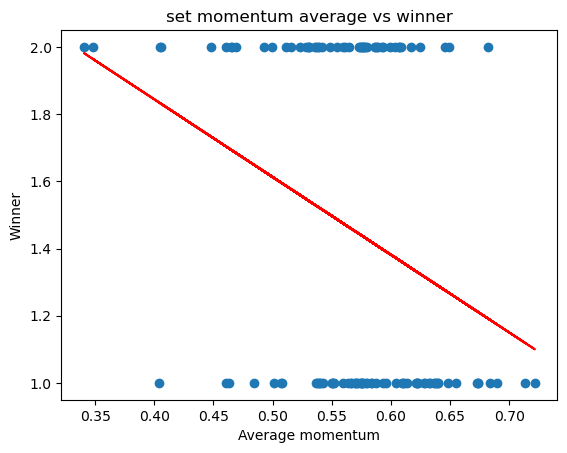

RMSE: 0.4723873193214017
MAE: 0.4462995589113199
MAPE: 0.18595814954638326
R2: nan
Pearson correlation coefficient: 0.3153421084334586
Spearman correlation coefficient: 0.29791359273996626


/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [15]:
plot_momentum_average_LR("set")

(1188, 1) (1188, 1)
Slope: [-1.01739856]
Intercept: [2.0627236]


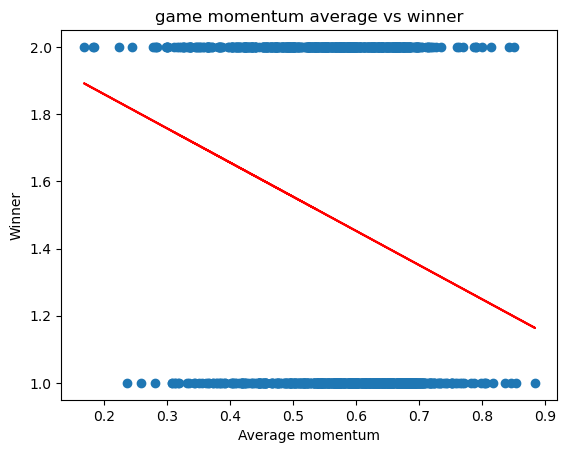

RMSE: 0.48733309891113147
MAE: 0.47498709858865334
MAPE: 0.19791129107860556
R2: nan
Pearson correlation coefficient: 0.22072809791955889
Spearman correlation coefficient: 0.22352985709696357


/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [16]:
plot_momentum_average_LR("game")

## hist

In [21]:
def transform_to_histogram(momentum_list, bins_num):
    hist_list = []
    for sublist in momentum_list:
        hist, bin_edges = np.histogram(sublist, bins=bins_num)
        hist_list.append(hist)
    return np.array(hist_list)

In [22]:
momentum_set_hist = transform_to_histogram(momentum_set_list, 10)
momentum_game_hist = transform_to_histogram(momentum_game_list, 10)

In [23]:
dict_momentum_hist = {
    "set": momentum_set_hist,
    "game": momentum_game_hist,
}

In [26]:
def plot_momentum_hist_LR(level):
    # Create a linear regression model
    model = LinearRegression()
    X = dict_momentum_hist[level]
    y = dict_winner[level]
    print(X.shape, y.shape)
    # Fit the model to the data
    model.fit(X, y)

    # Get the coefficients and intercept of the linear regression model
    slope = model.coef_[0]
    intercept = model.intercept_

    # Print the coefficients and intercept
    print("Slope:", slope)
    print("Intercept:", intercept)

    # # plot the LR model
    # plt.scatter(X, y)
    # plt.plot(X, model.predict(X), color='red')
    # plt.xlabel("Histogram")
    # plt.ylabel("Winner")
    # plt.title(f"{level} momentum histogram vs winner")
    # plt.show()

    calculateMetrics(model.predict(X), y)

In [27]:
plot_momentum_hist_LR("set")

(117, 10) (117, 1)
Slope: [ 0.00798678  0.00238601 -0.01469605  0.00711465  0.00822919  0.00849775
 -0.0061144  -0.00612694  0.00218654  0.00550196]
Intercept: [1.33451481]
RMSE: 0.4880792720555291
MAE: 0.4764427516205104
MAPE: 0.19851781317521267
R2: nan
Pearson correlation coefficient: 0.19651112789964192
Spearman correlation coefficient: 0.17590119980892205


/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [28]:
plot_momentum_hist_LR("game")

(1188, 10) (1188, 1)
Slope: [ 0.0323187   0.0474423   0.03940698  0.01469524  0.01519017 -0.00801271
  0.01011015  0.00725829 -0.03325872 -0.04334874]
Intercept: [1.45922799]
RMSE: 0.49423817672680936
MAE: 0.48854275066848185
MAPE: 0.20355947944520075
R2: nan
Pearson correlation coefficient: 0.14687528127330368
Spearman correlation coefficient: 0.15375047266289688


/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/yichao/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
